In [103]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd

#pd.read_csv('/content/drive/My Drive/Bahman.Group.csv')
#pd.read_csv('/content/drive/My Drive/Zamyad.csv')
#pd.read_csv('/content/drive/My Drive/Nirou.Moharreke.csv')
#pd.read_csv('/content/drive/My Drive/S_Pars.Khodro.csv')
#pd.read_csv('/content/drive/My Drive/S_IranKhodroDiesel.csv')

!pip install unidecode
!pip install jdatetime
!pip install khayyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import jdatetime
from khayyam import *
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
#!pip install openpyxl

!pip install openpyxl==3.0.0
!pip install pandas
import pandas as pd
df= pd.read_csv('/content/drive/My Drive/social_data_files/adjusted/khZamia.csv',encoding='utf-16')

hashtag_df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/social_data_files/telegram_data/khZamia.xlsx"))
hashtag_df.head()




,پایگاه داده,منتشر کننده,نام کاربری,لینک داشبورد,لینک اصلی,زمان انتشار,عنوان,خلاصه,متن,تعداد بازتاب,تعداد نمایش/واکنش,تعداد کامنت(برای خبر),تعداد لایک(برای کامنت و توییت),تعداد دیسلایک(برای کامنت),تعداد ریتوییت(برای توییتر),سنتیمنت اتوماتیک
0,telegram,Snip__Bourse,snip_bourse,/record/70982454,https://telegram.me/snip_bourse/6233,۱۳:۰۹:۲۰ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",0,76,0,0,0,0,خنثی
1,telegram,Upterend || روند صعودی,Upterend,/record/70982485,https://telegram.me/Upterend/5937,۱۳:۰۲:۳۷ ۱۴۰۰/۱۱/۱۰,NaN,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,1,1967,0,0,0,0,مثبت
2,telegram,Economicpaper,economicpaper,/record/70982420,https://telegram.me/economicpaper/7853,۱۲:۰۳:۴۱ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",0,11,0,0,0,0,خنثی
3,telegram,ره‌آورد ۳۶۵,rahavard365,/record/70982423,https://telegram.me/rahavard365/45372,۱۲:۰۰:۱۲ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",3,2072,0,0,0,0,خنثی
4,telegram,اخبار شرکتها و مجامع بورسی,akhbar_majame,/record/70982458,https://telegram.me/akhbar_majame/25498,۱۱:۴۴:۴۱ ۱۴۰۰/۱۱/۱۰,NaN,حرکت #خزامیا در مدار 2.01 درصد منفی/پیشتازی حق...,حرکت #خزامیا در مدار 2.01 درصد منفی/پیشتازی حق...,0,2756,0,0,0,0,خنثی


In [105]:
new_hashtag = pd.DataFrame(index=range(0,len(hashtag_df)),columns=['Date','view_count'])

In [106]:
for i in range(len(hashtag_df)):
  a = hashtag_df['زمان انتشار'][i]
  a = unidecode(a)
  # print(a)
  b=a.split()[1]
  # print(b)
  new_hashtag["Date"][i] = JalaliDatetime.strptime(b, '%Y/%m/%d').todate()
  new_hashtag['view_count'][i] = hashtag_df['تعداد نمایش/واکنش'][i] 

In [107]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

In [108]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

j = 0
for i in range(len(new_hashtag)):
  if i == j == 0:
    # _date = new_hashtag['Date'][i]
    # _view_count = new_hashtag['view_count'][i]
    # tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'])
    # aggregated_hashtag_df.append(tmp_df)
    aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]
    # print(len(aggregated_hashtag_df))
  elif new_hashtag['Date'][i] == new_hashtag['Date'][i - 1]:
    # print("j: ", j)
    aggregated_hashtag_df['view_count'][j] += new_hashtag['view_count'][i]
  else:
    j += 1
    _date = new_hashtag['Date'][i]
    _view_count = new_hashtag['view_count'][i]
    tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'], index=[j])
    aggregated_hashtag_df=aggregated_hashtag_df.append(tmp_df)
    # print("len: ", len(aggregated_hashtag_df))
    # aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    # aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]



In [109]:
aggregated_hashtag_df.index = aggregated_hashtag_df['Date']
# print(aggregated_hashtag_df['Date'][1])

In [110]:
aggregated_hashtag_df.head()

,Date,view_count
Date,,
2022-01-30,2022-01-30,54518
2022-01-29,2022-01-29,39410
2022-01-28,2022-01-28,9991
2022-01-27,2022-01-27,23916
2022-01-26,2022-01-26,15878


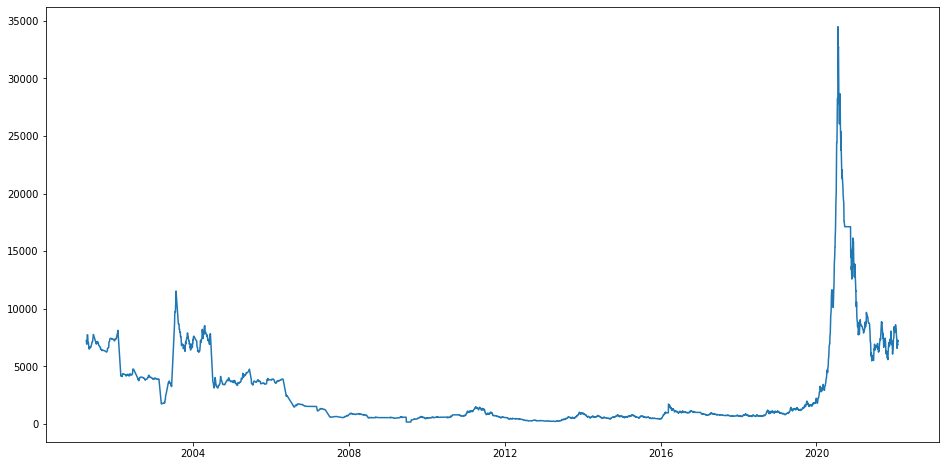

In [111]:
df["Date"]=pd.to_datetime(df["<DTYYYYMMDD>"],format="%Y%m%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["<CLOSE>"],label='Close Price history')

In [112]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close','Open','High','Vol','Low'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["<CLOSE>"][i]
    new_dataset["Open"][i]=data["<OPEN>"][i]
    new_dataset["High"][i]=data["<HIGH>"][i]
    new_dataset["Vol"][i]=data["<VOL>"][i]
    new_dataset["Low"][i]=data["<LOW>"][i]



In [113]:
tmp_dataset=new_dataset.copy()
tmp_dataset
tmp_dataset['Date'] = pd.to_datetime(tmp_dataset['Date']).dt.date
#tmp_dataset
tmp_dataset.set_index('Date', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low
Date,,,,,
2001-04-08,7236.53,7105.16,7237.0,6413,7102.0
2001-04-10,7151.99,7151.99,7152.0,204,7152.0
2001-04-11,6937.36,7024.08,7024.0,4170,6937.0
2001-04-14,6937.36,6937.36,6937.0,9654,6807.0
2001-04-15,7024.08,6937.36,7024.0,3143,6937.0
...,...,...,...,...,...
2022-01-29,6950.0,6850.0,7010.0,28693495,6760.0
2022-01-30,6860.0,6950.0,7150.0,21167703,6710.0
2022-01-31,7040.0,6670.0,7200.0,23751787,6600.0


In [114]:
#CHANGE
#idx = pd.date_range('2001-05-06', '2022-01-30')
idx = pd.date_range('2019-03-21', '2022-01-30')
tmp_dataset = tmp_dataset.reindex(idx, fill_value=0)
for i in range(len(tmp_dataset)):
  if tmp_dataset['Close'][i] == 0:
    tmp_dataset['Close'][i] = tmp_dataset['Close'][i-1]
  if tmp_dataset['Open'][i] == 0:
    tmp_dataset['Open'][i] = tmp_dataset['Open'][i-1]
  if tmp_dataset['High'][i] == 0:
    tmp_dataset['High'][i] = tmp_dataset['High'][i-1]
  if tmp_dataset['Vol'][i] == 0:
    tmp_dataset['Vol'][i] = tmp_dataset['Vol'][i-1]
  if tmp_dataset['Low'][i] == 0:
    tmp_dataset['Low'][i] = tmp_dataset['Low'][i-1]
  
tmp_dataset

,Close,Open,High,Vol,Low
2019-03-21,6860.0,6950.0,7150.0,21167703,6710.0
2019-03-22,6860.0,6950.0,7150.0,21167703,6710.0
2019-03-23,6860.0,6950.0,7150.0,21167703,6710.0
2019-03-24,6860.0,6950.0,7150.0,21167703,6710.0
2019-03-25,887.0,869.0,906.0,20218094,860.0
...,...,...,...,...,...
2022-01-26,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6850.0,7010.0,28693495,6760.0


In [115]:
tmp_dataset.index.name = 'Date'
tmp_dataset.tail(10)
# aggregated_hashtag_df = aggregated_hashtag_df.drop(['Date'], axis=1)
# aggregated_hashtag_df.head()

,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,7730.0,7790.0,7990.0,11244143,7570.0
2022-01-22,7420.0,7410.0,7830.0,23404457,7350.0
2022-01-23,7070.0,7140.0,7260.0,13757976,7050.0
2022-01-24,6890.0,7140.0,7140.0,23293072,6720.0
2022-01-25,6570.0,6650.0,6870.0,23200326,6550.0
2022-01-26,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6850.0,7010.0,28693495,6760.0


In [116]:
aggregated_hashtag_df.index.astype = 'datetime64[ns]'
tmp_dataset.index.astype = 'datetime64[ns]'


In [117]:
tmp_dataset.tail(10)


,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,7730.0,7790.0,7990.0,11244143,7570.0
2022-01-22,7420.0,7410.0,7830.0,23404457,7350.0
2022-01-23,7070.0,7140.0,7260.0,13757976,7050.0
2022-01-24,6890.0,7140.0,7140.0,23293072,6720.0
2022-01-25,6570.0,6650.0,6870.0,23200326,6550.0
2022-01-26,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6710.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6850.0,7010.0,28693495,6760.0


In [118]:
aggregated_hashtag_df.tail()

,Date,view_count
Date,,
2019-03-25,2019-03-25,60738
2019-03-24,2019-03-24,2709
2019-03-23,2019-03-23,1969
2019-03-22,2019-03-22,942
2019-03-21,2019-03-21,878


In [119]:
inner_merged_total = pd.merge(tmp_dataset, aggregated_hashtag_df, left_index=True, right_index=True)
inner_merged_total
####del inner_merged_total['Date']
inner_merged_total


,Close,Open,High,Vol,Low,Date,view_count
Date,,,,,,,
2019-03-21,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-21,878
2019-03-22,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-22,942
2019-03-23,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-23,1969
2019-03-24,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-24,2709
2019-03-25,887.0,869.0,906.0,20218094,860.0,2019-03-25,60738
...,...,...,...,...,...,...,...
2022-01-26,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-26,15878
2022-01-27,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-27,23916
2022-01-28,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-28,9991


In [120]:
merged_df = inner_merged_total

In [121]:
import numpy as np
import pandas as pd

merged_df['Date'] = merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df['period'] = merged_df.index
merged_df.set_index('period', inplace = True)
merged_df

,Close,Open,High,Vol,Low,Date,view_count
period,,,,,,,
0,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-21,878
1,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-22,942
2,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-23,1969
3,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-24,2709
4,887.0,869.0,906.0,20218094,860.0,2019-03-25,60738
...,...,...,...,...,...,...,...
1039,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-26,15878
1040,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-27,23916
1041,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-28,9991


In [122]:
tmp_dataset

tmp_dataset['Date'] = tmp_dataset.index
tmp_dataset.reset_index(drop=True, inplace=True)
tmp_dataset['period'] = tmp_dataset.index
tmp_dataset.set_index('period', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low,Date
period,,,,,,
0,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-21
1,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-22
2,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-23
3,6860.0,6950.0,7150.0,21167703,6710.0,2019-03-24
4,887.0,869.0,906.0,20218094,860.0,2019-03-25
...,...,...,...,...,...,...
1042,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-26
1043,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-27
1044,6680.0,6710.0,6880.0,22351572,6410.0,2022-01-28


In [123]:
copy_data = tmp_dataset.copy()

In [124]:
new_dataset = pd.DataFrame(index=range(0,len(copy_data)),columns=['Date','Close'])

#CHANGE

In [125]:
for i in range(len(copy_data)):
  new_dataset['Date'][i] = copy_data['Date'][i]
  new_dataset['Close'][i] = copy_data['Close'][i] 

In [126]:
new_dataset

,Date,Close
0,2019-03-21 00:00:00,6860.0
1,2019-03-22 00:00:00,6860.0
2,2019-03-23 00:00:00,6860.0
3,2019-03-24 00:00:00,6860.0
4,2019-03-25 00:00:00,887.0
...,...,...
1042,2022-01-26 00:00:00,6680.0
1043,2022-01-27 00:00:00,6680.0
1044,2022-01-28 00:00:00,6680.0
1045,2022-01-29 00:00:00,6950.0


In [127]:
#CHANGE
TRAIN_NUM = 980
WDTH = 60
UNIT = 50
FILENAME_RESULT = 'eco_only_close_2019.csv'

In [128]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
#print(final_dataset)
train_data=final_dataset[0:TRAIN_NUM,:]
valid_data=final_dataset[TRAIN_NUM:,:]
new_dataset.index=new_dataset.Date
#print(new_dataset)
new_dataset.drop("Date",axis=1,inplace=True)
#print(new_dataset)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(WDTH,len(train_data)):
    #CHANGE
    x_train_data.append(scaled_data[i-WDTH:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [129]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=UNIT,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=UNIT))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-WDTH:].values
inputs_data=inputs_data.reshape(-1,1)
print("dsfsdf",inputs_data.shape)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
train_loss = lstm_model.evaluate(x_train_data, y_train_data, verbose=0)

print("Train loss:",train_loss)

dsfsdf (127, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


920/920 - 19s - loss: 0.0022 - accuracy: 0.0011 - 19s/epoch - 21ms/step
Train loss: [0.0008670290117152035, 0.0010869564721360803]


In [130]:
X_test=[]
for i in range(WDTH,inputs_data.shape[0]):
    X_test.append(inputs_data[i-WDTH:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [131]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


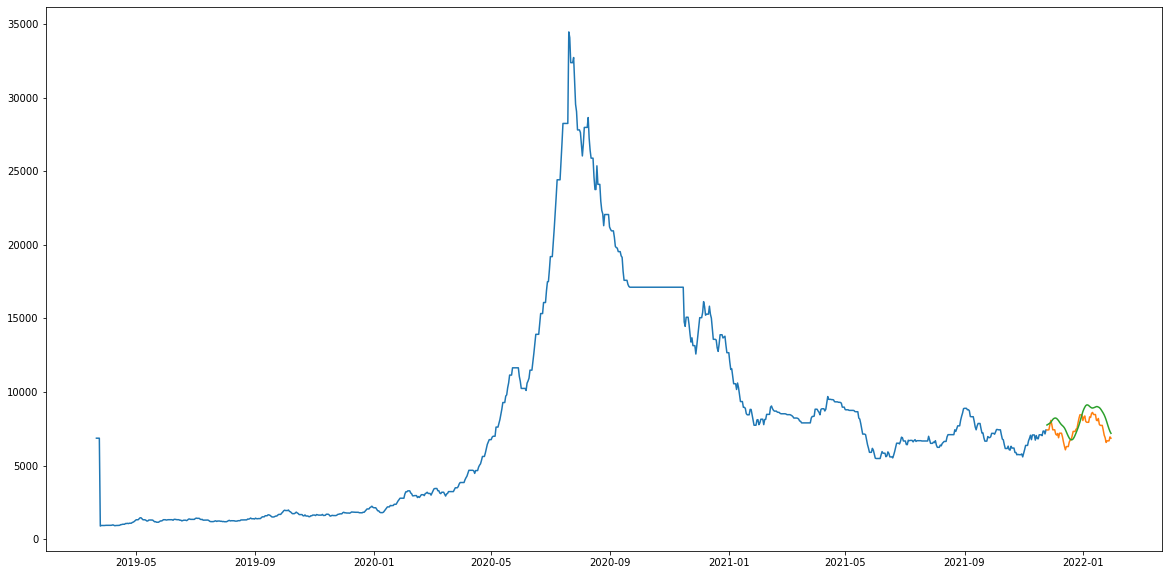

In [132]:
train_data=new_dataset[:TRAIN_NUM]
valid_data=new_dataset[TRAIN_NUM:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [133]:
len_df = len(valid_data['Predictions'])
valid_data['Growth'] = np.nan
valid_data['Growth Percent'] = np.nan

for i in range (len_df-1):
  GrowthPercent =((valid_data['Predictions'][i+1] - valid_data['Close'][i])/ valid_data['Close'][i])*100
  valid_data['Growth Percent'][i+1] = GrowthPercent
  status = "-"
  if (GrowthPercent > 0.5):
    status = +1
  elif(GrowthPercent < -0.5):
    status = -1
  else:
    status = 0
  valid_data['Growth'][i+1] = status
valid_data.head(100)
valid_data.to_csv(FILENAME_RESULT)
valid_data.tail(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Close,Predictions,Growth,Growth Percent
Date,,,,
2021-11-25,7420.0,7756.308594,NaN,NaN
2021-11-26,7420.0,7796.228027,1.0,5.070459
2021-11-27,7430.0,7838.332520,1.0,5.637905
2021-11-28,7770.0,7879.726074,1.0,6.052841
2021-11-29,8070.0,7942.551758,1.0,2.220743
...,...,...,...,...
2022-01-26,6680.0,7895.538086,1.0,20.175618
2022-01-27,6680.0,7684.540039,1.0,15.038025
2022-01-28,6680.0,7487.680176,1.0,12.091021


In [134]:
from sklearn.metrics import mean_squared_error
test_y = valid_data['Close'].values
pred_y = valid_data['Predictions'].values
test_y= test_y.tolist()
pred_y= pred_y.tolist()
errors = mean_squared_error(test_y, pred_y)/10000
print("errors " ,errors)

errors  63.95524614915313
